In [40]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/2024 18061 - Mutual_fund Data.csv')

df.head()


,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51%,28.32,37.79%,20.29%,Rs.500.0,Abhinav Khandelwal,2569.63 cr,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25%,24.89,46.08%,21.93%,Rs.500.0,Abhinav Khandelwal,322.26 cr,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94%,35.11,54.46%,27.48%,Rs.500.0,Abhinav Khandelwal,3292.76 cr,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37%,21.40,59.79%,0,Rs.500.0,Abhinav Khandelwal,5278.7 cr,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06%,23.69,32.07%,15.18%,Rs.500.0,Abhinav Khandelwal,577.72 cr,Equity,Very High


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMC                    1393 non-null   object 
 1   Fund Name              1393 non-null   object 
 2   Morning star rating    1393 non-null   int64  
 3   Value Research rating  1393 non-null   int64  
 4   1 month return         1393 non-null   object 
 5   NAV                    1393 non-null   float64
 6   1 Year return          1393 non-null   object 
 7   3 Year Return          1393 non-null   object 
 8   Minimum investment     1393 non-null   object 
 9   Fund Manager           1354 non-null   object 
 10  AUM                    1393 non-null   object 
 11  Category               1393 non-null   object 
 12  Risk                   1393 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 141.6+ KB


There are null values in Fund Manager column so we must fill it.

In [43]:
missing_fund_managers = df[df['Fund Manager'].isnull()]
missing_fund_managers

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
767,sundaram mutual fund,Sundaram Balanced Advantage Fund Reg-G,0,0,0.92%,14.63,14.91%,0,Rs.100.0,NaN,1247.87 cr,Hybrid,Moderately High
768,sundaram mutual fund,Sundaram Equity Savings Fund Reg-G,0,0,0.54%,12.49,8.08%,7.49%,Rs.100.0,NaN,157.58 cr,Hybrid,Moderate
769,sundaram mutual fund,Sundaram Equity Hybrid Reg-G,3,0,0,84.14,0,0,Rs.100.0,NaN,1954.01 cr,Hybrid,High
770,sundaram mutual fund,Sundaram Money Reg-G,5,3,0.29%,35.87,3.29%,4.69%,Rs.100.0,NaN,3144.09 cr,Debt,Low to Moderate
771,sundaram mutual fund,Sundaram Short Term Debt-G,3,0,0,29.30,0,0,Rs.100.0,NaN,361.74 cr,Debt,Low to Moderate
772,sundaram mutual fund,Sundaram Smart NIFTY 100 Equal Weight Fund Re,0,0,0,18.11,0,0,Rs.100.0,NaN,38.41 cr,Other,Very High
773,sundaram mutual fund,Sundaram Equity Fund Reg-G,0,0,0,16.59,0,0,Rs.100.0,NaN,828.43 cr,Equity,Very High
774,sundaram mutual fund,Sundaram Arbitrage Fund Reg-G,0,0,0.03%,10.66,3.19%,0,Rs.100.0,NaN,83.34 cr,Hybrid,Low to Moderate
775,hsbc mutual fund,HSBC Infrastructure Equity-G,1,0,0,27.88,0,0,Rs.1000.0,NaN,120.75 cr,Equity,Very High
776,sundaram mutual fund,Sundaram Ultra Short Term Fund Reg-G,0,0,0,11.03,0,0,Rs.1000.0,NaN,1284.95 cr,Debt,Low to Moderate


In [95]:
for idx, row in missing_fund_managers.iterrows():
    amc_value = row['AMC']


    possible_managers = df[df['AMC'] == amc_value]['Fund Manager'].dropna().unique()

    if len(possible_managers) > 0:

        df.at[idx, 'Fund Manager'] = possible_managers[0]
    else:

        df.at[idx, 'Fund Manager'] = 'Unknown Manager'

print(df[df['Fund Manager'].isnull()])


Empty DataFrame
Columns: [AMC, Fund Name, Morning star rating, Value Research rating, 1 month return, NAV, 1 Year return, 3 Year Return, Minimum investment, Fund Manager, AUM, Category, Risk]
Index: []


In [33]:
df.head(800)

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51%,28.32,37.79%,20.29%,Rs.500.0,Abhinav Khandelwal,2569.63 cr,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25%,24.89,46.08%,21.93%,Rs.500.0,Abhinav Khandelwal,322.26 cr,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94%,35.11,54.46%,27.48%,Rs.500.0,Abhinav Khandelwal,3292.76 cr,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37%,21.40,59.79%,0,Rs.500.0,Abhinav Khandelwal,5278.7 cr,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06%,23.69,32.07%,15.18%,Rs.500.0,Abhinav Khandelwal,577.72 cr,Equity,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,navi mutual fund,Navi 3 in 1-G,2,0,0,23.67,0,0,Rs.500.0,Aditya Mulki,15.89 cr,Hybrid,Very High
796,hsbc mutual fund,HSBC Corporate Bond Fund Reg-G,0,0,0,10.71,0,0,Rs.500.0,Ankur Arora,157.77 cr,Debt,Low to Moderate
797,hdfc mutual fund,HDFC Index Fund Nifty 50,0,0,5.06%,238.70,27.26%,14.29%,Rs.500.0,Anand Laddha,18127.0 cr,Other,Very High
798,dsp mutual fund,DSP Bond Ret-G 54EA,0,0,0.82%,76.44,7.86%,5.45%,Rs.500.0,Anil Ghelani,371.65 cr,Debt,Moderate


In [48]:
  df['Fund Manager'].value_counts()

,count
Fund Manager,
Abhishek Bisen,37
Dwijendra Srivastava,26
Sanjeev Sharma,25
Bhavesh Jain,21
Dhawal Dalal,20
...,...
Anuj Kapil,1
S Bharath,1
Rupesh Patel,1


In [49]:
df['AMC'].value_counts()

,count
AMC,
aditya birla sun life mutual fund,98
icici prudential mutual fund,91
nippon india mutual fund,71
hdfc mutual fund,70
kotak mahindra mutual fund,68
uti mutual fund,67
sbi mutual fund,67
axis mutual fund,66
tata mutual fund,60


In [51]:
df['Fund Name'].value_counts()

,count
Fund Name,
Motilal Oswal Asset Allocation Passive FoF -,2
Aditya Birla SL CRISIL IBX 60:40 SDL+AAA PSU-,2
Mahindra Manulife Large & Mid Cap Reg-G,1
PGIM India Large Cap-G,1
SBI Overnight Reg-G,1
...,...
Bandhan Multi Asset Allocation Reg-G,1
Bandhan CRISIL IBX 90:10 SDL Plus Gilt-Septem,1
Bandhan Long Duration Reg-G,1


In [53]:
df[df.duplicated()]

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk


In [8]:
df.columns

Index(['AMC', 'Fund Name', 'Morning star rating', 'Value Research rating',
       '1 month return', 'NAV', '1 Year return', '3 Year Return',
       'Minimum investment', 'Fund Manager', 'AUM', 'Category', 'Risk'],
      dtype='object')

In [96]:
def convert_to_float(value):
    if isinstance(value, str) and '%' in value:
        return float(value.replace('%', ''))
    return value

df['1 month return'] = df['1 month return'].apply(convert_to_float)
df['1 Year return'] = df['1 Year return'].apply(convert_to_float)
df['3 Year Return'] = df['3 Year Return'].apply(convert_to_float)

df[['1 month return', '1 Year return', '3 Year Return']].head()


,1 month return,1 Year return,3 Year Return
0,5.51,37.79,20.29
1,7.25,46.08,21.93
2,5.94,54.46,27.48
3,8.37,59.79,0.00
4,4.06,32.07,15.18


In [74]:
type(df['1 Year return'][0])

float

In [56]:
df.head()

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51,28.32,37.79,20.29,Rs.500.0,Abhinav Khandelwal,2569.63 cr,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25,24.89,46.08,21.93,Rs.500.0,Abhinav Khandelwal,322.26 cr,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94,35.11,54.46,27.48,Rs.500.0,Abhinav Khandelwal,3292.76 cr,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37,21.40,59.79,0,Rs.500.0,Abhinav Khandelwal,5278.7 cr,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06,23.69,32.07,15.18,Rs.500.0,Abhinav Khandelwal,577.72 cr,Equity,Very High


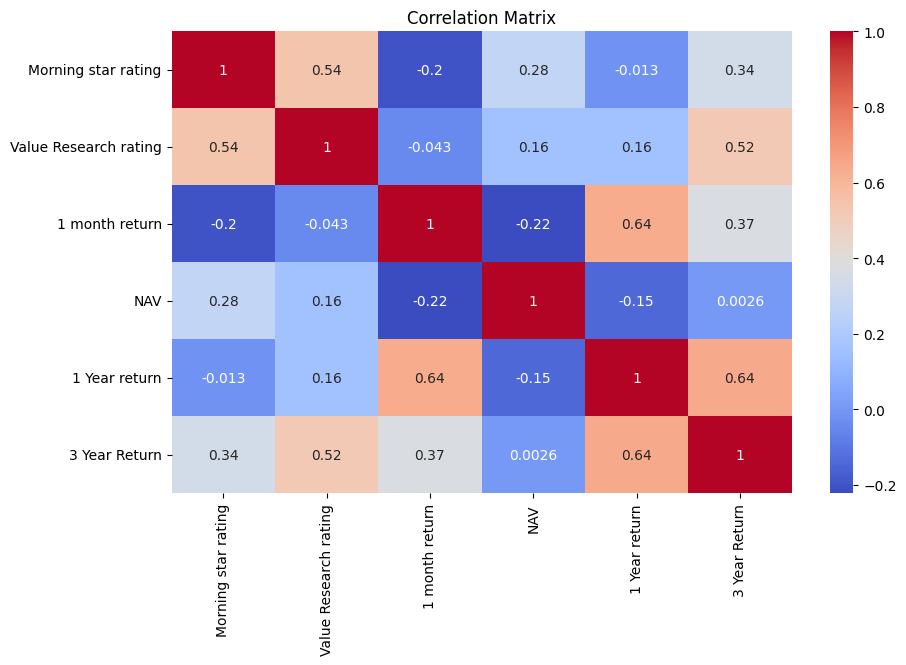

In [60]:
corr_matrix = df[['Morning star rating', 'Value Research rating', '1 month return', 'NAV', '1 Year return', '3 Year Return']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [64]:
df['Fund Manager'].unique()

array(['Abhinav Khandelwal', 'Abhinav Sharma', 'Abhiroop Mukherjee',
       'Abhishek Bisen', 'Abhishek Iyer', 'Abhishek Sonthalia',
       'Aditya Khemani', 'Aditya Mulki', 'Aditya Pagaria', 'Ajay Argal',
       'Ajay Khandelwal', 'Ajay Tyagi', 'Akhil Mittal', 'Alok Ranjan',
       'Alok Singh', 'Amandeep Singh Chopra', 'Amar Kalkundrikar',
       'Amey Sathe', 'Amit Ganatra', 'Amit Garg',
       'Amit Kumar Premchandani', 'Amit Nadekar', 'Amit Nigam',
       'Amit Sharma', 'Amit Somani', 'Amit Tripathi', 'Amit Vora',
       'Anand Laddha', 'Anand Radhakrishnan', 'Anil Bamboli',
       'Anil Ghelani', 'Anil Shah', 'Aniruddha Naha', 'Anish Tawakley',
       'Anju Chhajer', 'Ankit Agarwal', 'Ankit Jain', 'Ankit Tikmany',
       'Ankur Arora', 'Ankush Sood', 'Anoop Bhaskar', 'Anuj Kapil',
       'Anuj Tagra', 'Anupam Joshi', 'Anupam Tiwari', 'Anurag Mittal',
       'Arjun Khanna', 'Arun Agarwal', 'Ashish Naik', 'Ashutosh Bhargava',
       'Ashwani Kumar Agarwalla', 'Asit Bhandarkar', 'At

In [70]:
df['3 Year Return'] = df['3 Year Return'].apply(lambda x: float(str(x).replace('%', '')) if isinstance(x, str) else x)

fund_manager_performance = df.groupby('Fund Manager')['3 Year Return'].mean().reset_index()

fund_manager_performance = fund_manager_performance.sort_values(by='3 Year Return', ascending=False)

print(fund_manager_performance)


        Fund Manager  3 Year Return
148       Niket Shah         37.770
214     Sanjay Doshi         34.920
101      Ihab Dalwai         31.605
210      Samir Rachh         31.170
187      Rakesh Vyas         29.940
..               ...            ...
94       Harsh Sethi          0.000
144    Neeraj Saxena          0.000
252      Tapan Patel          0.000
150  Nirali Bhansali          0.000
179       Raj Gandhi          0.000

[276 rows x 2 columns]


In [75]:
df

,AMC,Fund Name,Morning star rating,Value Research rating,1 month return,NAV,1 Year return,3 Year Return,Minimum investment,Fund Manager,AUM,Category,Risk
0,mahindra manulife mutual fund,Mahindra Manulife Large & Mid Cap Reg-G,3,3,5.51,28.32,37.79,20.29,Rs.500.0,Abhinav Khandelwal,2569.63 cr,Equity,High
1,mahindra manulife mutual fund,Mahindra Manulife Consumption Reg-G,0,3,7.25,24.89,46.08,21.93,Rs.500.0,Abhinav Khandelwal,322.26 cr,Equity,High
2,mahindra manulife mutual fund,Mahindra Manulife Mid Cap Reg-G,4,4,5.94,35.11,54.46,27.48,Rs.500.0,Abhinav Khandelwal,3292.76 cr,Equity,High
3,mahindra manulife mutual fund,Mahindra Manulife Small Cap Reg-G,0,0,8.37,21.40,59.79,0.00,Rs.500.0,Abhinav Khandelwal,5278.7 cr,Equity,Very High
4,mahindra manulife mutual fund,Mahindra Manulife Large Cap Reg-G,4,3,4.06,23.69,32.07,15.18,Rs.500.0,Abhinav Khandelwal,577.72 cr,Equity,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,lic mutual fund,LIC MF Multi Cap Reg-G,0,0,4.56,17.43,48.89,0.00,Rs.1000.0,Yogesh Patil,1369.6 cr,Equity,Very High
1389,lic mutual fund,LIC MF Large Cap-G,2,3,4.85,57.66,31.34,13.48,Rs.1000.0,Yogesh Patil,1576.3 cr,Equity,Very High
1390,lic mutual fund,LIC MF Large & Mid Cap Reg-G,2,2,4.98,40.39,48.16,19.01,Rs.1000.0,Yogesh Patil,3220.66 cr,Equity,High
1391,lic mutual fund,LIC MF Infrastructure-G,3,4,2.92,51.91,76.07,33.55,Rs.1000.0,Yogesh Patil,725.1 cr,Equity,Very High


In [76]:

df['1 Year return'] = df['1 Year return'].apply(lambda x: float(str(x).replace('%', '')) if isinstance(x, str) else x)

fund_manager_1year_performance = df.groupby('Fund Manager')['1 Year return'].mean().reset_index()

fund_manager_1year_performance = fund_manager_1year_performance.sort_values(by='1 Year return', ascending=False)

print(fund_manager_1year_performance)

           Fund Manager  1 Year return
148          Niket Shah      68.830000
166        Priya Ranjan      66.186667
104  Jayesh Dinesh Shah      64.270000
6        Aditya Khemani      62.890000
214        Sanjay Doshi      60.550000
..                  ...            ...
160        Pranav Gupta       0.000000
158     Pradeep Kesavan       0.000000
26            Amit Vora       0.000000
151        Nishit Patel       0.000000
195        Ritesh Patel       0.000000

[276 rows x 2 columns]


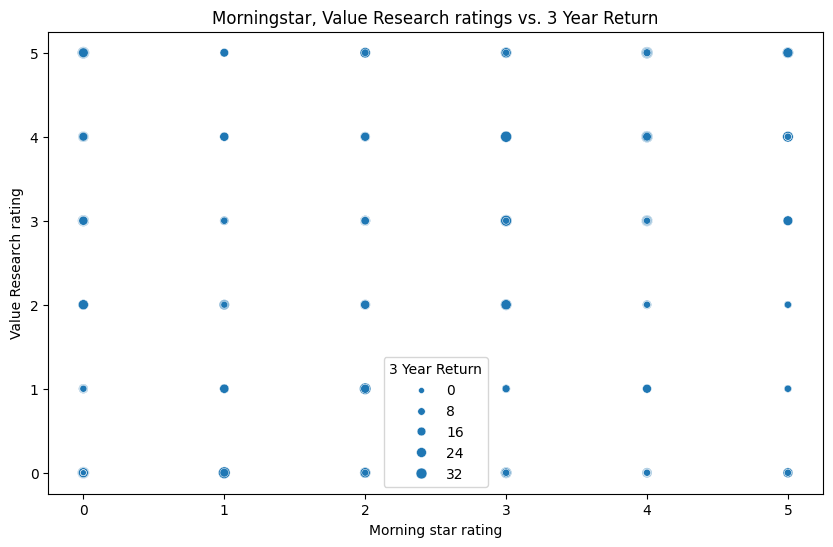

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Morning star rating', y='Value Research rating',
                size='3 Year Return', data=df)
plt.title('Morningstar, Value Research ratings vs. 3 Year Return')
plt.show()

<ipython-input-90-ac13df89edb0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['1 Year return'], shade=True)


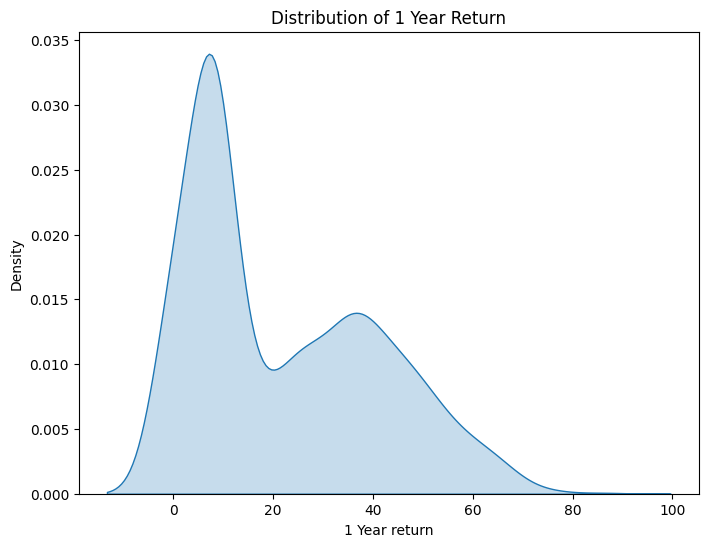

In [90]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['1 Year return'], shade=True)
plt.title('Distribution of 1 Year Return')
plt.show()

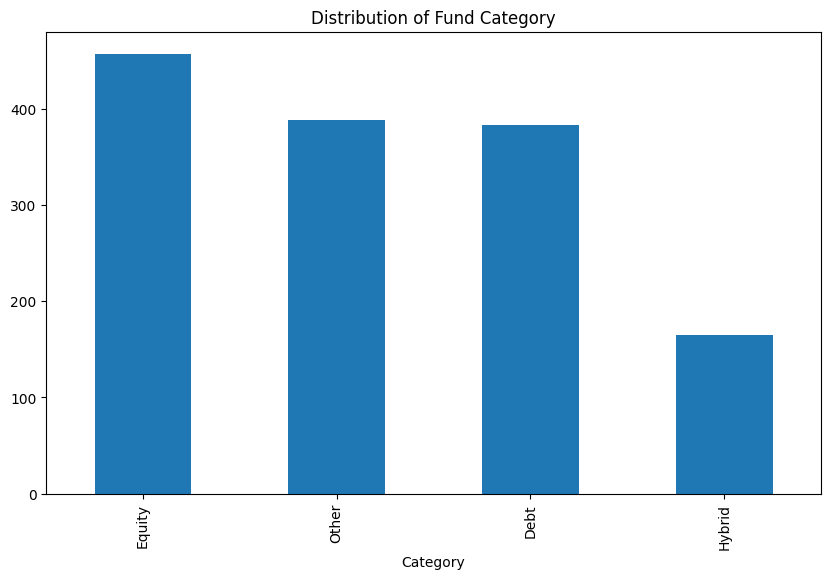

In [92]:
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Fund Category')
plt.show()

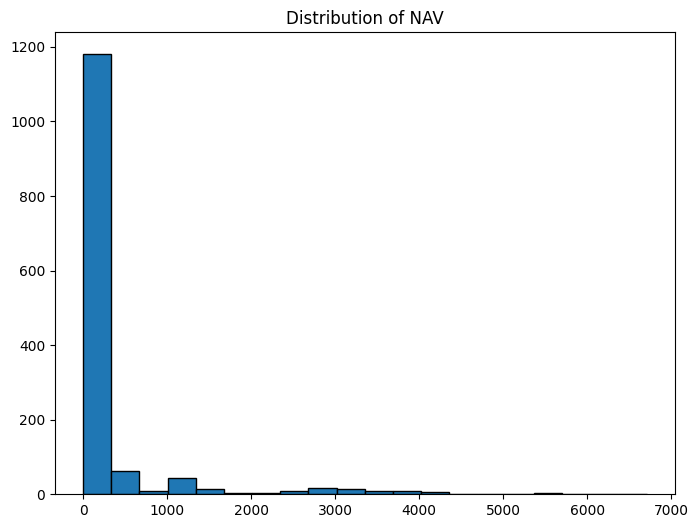

In [94]:
plt.figure(figsize=(8, 6))
plt.hist(df['NAV'], bins=20, edgecolor='black')
plt.title('Distribution of NAV')
plt.show()